In [5]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [13]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time
from ema_workbench import save_results, load_results

In [7]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(2)

In [8]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [9]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [10]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'), function=<function sum_over at 0x000001983489F2E0>)
ScalarOutcome('Dike Investment Costs', variable_name=('A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs', 'A.5_Dike Investment Costs'), function=<function sum_over at 0x000001983489F2E0>)
ScalarOutcome('RfR Investment Costs', variable_name=('RfR Total Costs',), function=<function sum_over at 0x000001983489F2E0>)
ScalarOutcome('Evacuation Costs', variable_name=('Expected Evacuation Costs',), function=<function sum_over at 0x000001983489F2E0>)
ScalarOutcome('Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'), function

In [11]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=1000, policies=50)

[MainProcess/INFO] pool started with 16 workers
[MainProcess/INFO] performing 1000 scenarios * 50 policies * 1 model(s) = 50000 experiments
100%|████████████████████████████████████| 50000/50000 [32:47<00:00, 25.41it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [14]:
save_results(results, 'data/runs/open_exploration_1000sc_50pol.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\svenk\Documents\GitHub\EPA141A-Model-based-decision-making\final assignment\data\runs\open_exploration_1000sc_50pol.tar.gz


In [16]:
results = load_results('data/runs/open_exploration_1000sc_50pol.tar.gz')

[MainProcess/INFO] results loaded successfully from C:\Users\svenk\Documents\GitHub\EPA141A-Model-based-decision-making\final assignment\data\runs\open_exploration_1000sc_50pol.tar.gz


In [17]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 'Expected Number of Deaths'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,69,195.819580,1.5,0.509200,58.582759,1.0,0.122428,86.851916,1.5,0.741049,...,6,3,3,10,9,0,1,50,0,dikesnet
1,118,63.313005,1.5,0.319935,318.693829,1.5,0.463670,156.783027,1.5,0.339027,...,6,3,3,10,9,0,1,51,0,dikesnet
2,88,120.791806,1.5,0.831240,149.008392,1.5,0.995251,300.507241,1.0,0.782059,...,6,3,3,10,9,0,1,52,0,dikesnet
3,32,249.056112,1.5,0.446656,280.076100,10.0,0.621526,220.202172,1.0,0.953604,...,6,3,3,10,9,0,1,53,0,dikesnet
4,1,320.169894,1.5,0.067225,347.892683,10.0,0.766375,180.894541,1.0,0.858160,...,6,3,3,10,9,0,1,54,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9,205.111630,1.5,0.096462,243.477795,10.0,0.285884,203.506519,10.0,0.961607,...,3,5,2,1,8,7,0,1045,49,dikesnet
49996,109,285.718645,10.0,0.818820,145.565474,1.0,0.314211,133.072018,1.5,0.733095,...,3,5,2,1,8,7,0,1046,49,dikesnet
49997,74,104.702273,1.0,0.816124,229.958898,10.0,0.235647,275.688340,10.0,0.654616,...,3,5,2,1,8,7,0,1047,49,dikesnet
49998,53,172.095581,10.0,0.762072,290.058421,1.5,0.130571,280.038912,1.5,0.952912,...,3,5,2,1,8,7,0,1048,49,dikesnet


In [37]:
data = outcomes['Expected Annual Damage']
y = data > np.percentile(data, 80)

In [38]:
from ema_workbench.analysis import prim

prim_alg = prim.Prim(experiments,y, threshold=0.7)
box1 = prim_alg.find_box()

[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 50000 points remaining, containing 10000 cases of interest
[MainProcess/INFO] mean: 0.742, mass: 0.06, coverage: 0.2226, density: 0.742 restricted_dimensions: 3


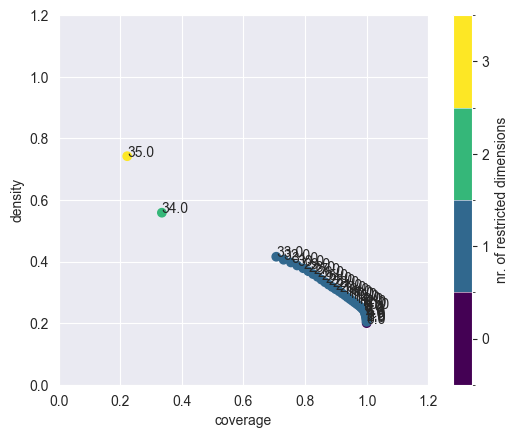

In [39]:
box1.show_tradeoff(annotated=True)
plt.show()

In [40]:
box1.inspect(35)

coverage       0.2226
density        0.7420
id            35.0000
k           2226.0000
mass           0.0600
mean           0.7420
n           3000.0000
res_dim        3.0000
Name: 35, dtype: float64

                                                    box 35  \
                                                       min   
2_RfR 0                                                0.0   
policy   {33, 34, 35, 4, 5, 37, 7, 10, 44, 15, 47, 48, ...   
0_RfR 1                                                  1   

                                                                           \
                                                       max       qp value   
2_RfR 0                                                0.0            NaN   
policy   {33, 34, 35, 4, 5, 37, 7, 10, 44, 15, 47, 48, ...   0.000000e+00   
0_RfR 1                                                  1  7.423512e-248   

                       
             qp value  
2_RfR 0  2.567941e-96  
policy            NaN  
0_RfR

C:\Users\svenk\AppData\Local\Programs\Python\Python312\Lib\site-packages\ema_workbench\analysis\prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{33, 34, 35, 4, 5, 37, 7, 10, 44, 15, 47, 48, 18, 49, 20, 23, 27}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
C:\Users\svenk\AppData\Local\Programs\Python\Python312\Lib\site-packages\ema_workbench\analysis\prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{33, 34, 35, 4, 5, 37, 7, 10, 44, 15, 47, 48, 18, 49, 20, 23, 27}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


[None]